In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-dataset/placement.csv


In [2]:
df = pd.read_csv("/kaggle/input/placement-dataset/placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
# remove 1st col
df = df.iloc[: ,1:]

In [6]:
df.tail()

,cgpa,iq,placement
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1
99,6.2,113.0,1


In [7]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [9]:
import matplotlib.pyplot as plt

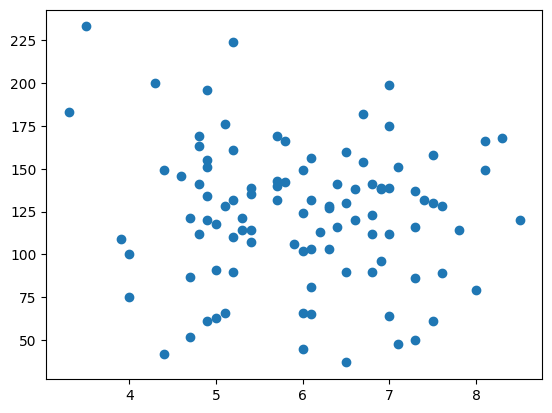

In [10]:
plt.scatter(df['cgpa'],df['iq'])
plt.show()

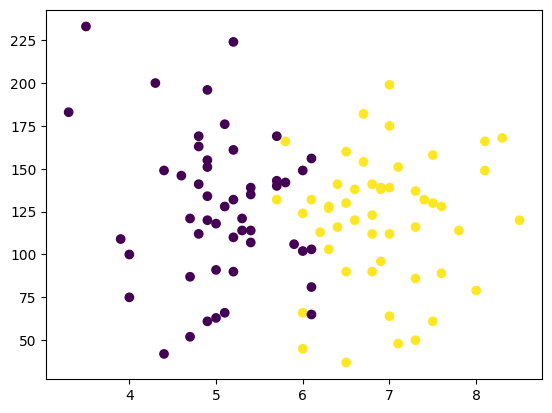

In [11]:
plt.scatter(df['cgpa'],df['iq'],c = df['placement'])
plt.show()

In [12]:
x = df.iloc[: ,0:2]
y = df.iloc[: ,-1]

In [13]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [14]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [16]:
x_train

,cgpa,iq
99,6.2,113.0
53,8.3,168.0
3,7.4,132.0
45,6.0,66.0
22,4.9,120.0
...,...,...
94,4.7,52.0
68,4.0,75.0
1,5.9,106.0
87,5.7,132.0


In [17]:
x_test

,cgpa,iq
62,6.0,102.0
33,6.0,149.0
44,7.5,61.0
2,5.3,121.0
42,7.6,89.0
86,5.1,128.0
88,4.4,149.0
11,6.9,138.0
54,6.4,141.0
7,5.0,63.0


In [18]:
y_train

99    1
53    1
3     1
45    1
22    0
     ..
94    0
68    0
1     0
87    1
58    1
Name: placement, Length: 90, dtype: int64

In [19]:
y_test

62    0
33    0
44    1
2     0
42    1
86    0
88    0
11    1
54    1
7     0
Name: placement, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler  # scaling

In [21]:
scaler = StandardScaler()

after scalling all the value should be in between (-1 to 1)

In [22]:
x_train = scaler.fit_transform(x_train)

In [23]:
x_train

array([[ 0.18468732, -0.28806511],
       [ 2.01222156,  1.07384728],
       [ 1.2289926 ,  0.18241372],
       [ 0.01063644, -1.45188115],
       [-0.9466434 , -0.1147308 ],
       [ 0.70683996, -0.31282715],
       [-1.03366884,  0.95003707],
       [-0.5115162 , -0.43663737],
       [-0.16341444,  1.0243232 ],
       [-0.9466434 ,  1.7671845 ],
       [ 0.70683996, -0.85759211],
       [ 0.61981452,  1.42051589],
       [-0.68556708, -0.36235124],
       [-1.46879603,  1.86623268],
       [ 0.09766188,  0.77670276],
       [ 0.01063644, -1.97188406],
       [-0.68556708,  2.46052172],
       [-0.77259252, -1.45188115],
       [ 0.27171276, -0.53568554],
       [-1.72987235, -0.60997167],
       [ 0.7938654 , -0.70901984],
       [ 0.88089084,  1.84147063],
       [-1.03366884,  0.40527211],
       [-0.68556708, -0.85759211],
       [ 0.09766188, -1.47664319],
       [ 2.18627244, -0.1147308 ],
       [ 1.57709436, -0.26330306],
       [-1.12069428, -0.08996876],
       [-0.25043988,

In [24]:
x_test = scaler.transform(x_test)

In [25]:
x_test

array([[ 0.01063644, -0.56044758],
       [ 0.01063644,  0.60336846],
       [ 1.31601804, -1.57569137],
       [-0.59854164, -0.08996876],
       [ 1.40304348, -0.88235415],
       [-0.77259252,  0.08336555],
       [-1.38177059,  0.60336846],
       [ 0.7938654 ,  0.33098598],
       [ 0.3587382 ,  0.40527211],
       [-0.85961796, -1.52616728]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [28]:
# model train
clf.fit(x_train,y_train)

LogisticRegression()

In [29]:
#model Evulation
y_pred = clf.predict(x_test)

In [33]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [30]:
y_test

62    0
33    0
44    1
2     0
42    1
86    0
88    0
11    1
54    1
7     0
Name: placement, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test , y_pred)

0.8

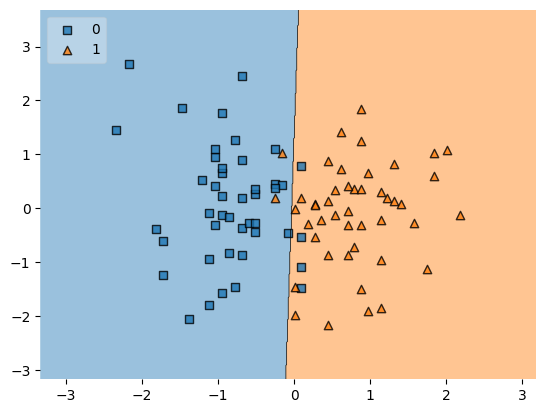

In [35]:
# use decision boundry to know that model what should be pattern noticed
from mlxtend.plotting import plot_decision_regions
# Plotting decision regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)
plt.show()

In [36]:
import pickle

# Model save
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

# Scaler save
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [38]:
# Example new data
new_data = pd.DataFrame({
    'cgpa': [6.8],
    'iq': [130]
})

# Scaling (important)
new_data_scaled = scaler.transform(new_data)

# Prediction
prediction = clf.predict(new_data_scaled)

print(prediction)

[1]
